# Basic Swaps

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `TwoBitSwap`
Swap two bits.

This is a Clifford operation.

#### Registers
 - `x`: the first bit
 - `y`: the second bit


In [2]:
from qualtran.bloqs.basic_gates import TwoBitSwap

### Example Instances

In [3]:
swap_bit = TwoBitSwap()

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([swap_bit],
           ['`swap_bit`'])

## `TwoBitCSwap`
Swap two bits controlled on a control bit.

This is sometimes known as the [Fredkin Gate](https://en.wikipedia.org/wiki/Fredkin_gate).

#### Registers
 - `ctrl`: the control bit
 - `x`: the first bit
 - `y`: the second bit 

#### References
 - [An algorithm for the T-count](https://arxiv.org/abs/1308.4134). Gosset et al. 2013. Figure 5.2.


In [5]:
from qualtran.bloqs.basic_gates import TwoBitCSwap

### Example Instances

In [6]:
cswap_bit = TwoBitCSwap()

#### Graphical Signature

In [7]:
from qualtran.drawing import show_bloqs
show_bloqs([cswap_bit],
           ['`cswap_bit`'])

### Clifford+T circuit

In Qualtran, this bloq is treated as atomic because its implementation is architecture-dependent. A clifford+T compilation is provided via a Cirq circuit on the `to_clifford_t_circuit()` method

In [8]:
cswap_bit.to_clifford_t_circuit()

┌──┐          ┌─────┐
ctrl: ───────@───T───────────@─────@───────────@────────────────
             │               │     │           │
x: ──────X───X───T^-1───X────┼T────X───────T^-1┼────X───T───X───
         │              │    │                 │    │       │
y: ──────@───H───T──────@────X─────T^-1────────X────@───H───@───
                            └──┘          └─────┘

## `Swap`
Swap two registers

This corresponds to a qubitwise `TwoBitSwap` on the two registers.

#### Parameters
 - `bitsize`: The bitsize of each of the two registers being swapped. 

#### Registers
 - `x`: the first register
 - `y`: the second register


In [9]:
from qualtran.bloqs.basic_gates import Swap

### Example Instances

In [10]:
n = sympy.Symbol('n', positive=True, integer=True)
swap = Swap(bitsize=n)

In [11]:
swap_small = Swap(bitsize=4)

In [12]:
swap_large = Swap(bitsize=64)

#### Graphical Signature

In [13]:
from qualtran.drawing import show_bloqs
show_bloqs([swap, swap_small, swap_large],
           ['`swap`', '`swap_small`', '`swap_large`'])

### Call Graph

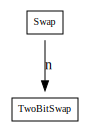

#### Counts totals:
 - `TwoBitSwap`: $\displaystyle n$

In [14]:
from qualtran.resource_counting.generalizers import ignore_split_join
swap_g, swap_sigma = swap.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(swap_g)
show_counts_sigma(swap_sigma)

## `CSwap`
Swap two registers controlled on a control bit.

This decomposes into a qubitwise `TwoBitCSwap` on the two target registers,
and takes $n$ TwoBitCSwap gates.

#### Parameters
 - `bitsize`: The bitsize of each of the two registers being swapped. 

#### Registers
 - `ctrl`: the control bit
 - `x`: the first register
 - `y`: the second register


In [15]:
from qualtran.bloqs.basic_gates import CSwap

### Example Instances

In [16]:
n = sympy.Symbol('n', positive=True, integer=True)
cswap = CSwap(bitsize=n)

In [17]:
# A small version on four bits.
cswap_small = CSwap(bitsize=4)

In [18]:
# A large version that swaps 64-bit registers.
cswap_large = CSwap(bitsize=64)

#### Graphical Signature

In [19]:
from qualtran.drawing import show_bloqs
show_bloqs([cswap, cswap_small, cswap_large],
           ['`cswap`', '`cswap_small`', '`cswap_large`'])

### Call Graph

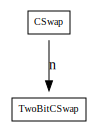

#### Counts totals:
 - `TwoBitCSwap`: $\displaystyle n$

In [20]:
from qualtran.resource_counting.generalizers import ignore_split_join
cswap_g, cswap_sigma = cswap.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(cswap_g)
show_counts_sigma(cswap_sigma)